# Chapter 1: Introduction to Time Series
- [Different types of data](#p1)
  - Cross-sectional data
  - Time series data
  - Panel data

- [Internal structures of time series](#p2)
  - General trend
  - Seasonality
      - Run sequence plot
      - Seasonal sub series plot
      - Multiple box plots
  - Cyclical changes
  - Unexpected variations

- [Models for time series analysis](#p3)
  - Zero mean models
  - Random walk
  - Trend models
  - Seasonality models

- [Autocorrelation and Partial autocorrelation](#p4)

<a name="p1"></a>
## 1.1 Different types of data 
### Cross-sectional data
Can comprise of observations taken at different points in time, however, in such cases time itself does not play any significant role in the analysis.

Often, analysis of cross-sectional data starts with a plot of the variables to visualize their statistical properties such as central tendency, dispersion, skewness, and kurtosis.

[World Development Indicators Dataset](https://www.kaggle.com/worldbank/world-development-indicators/discussion/38893)

In [1]:
import pandas as pd

wdi = pd.read_csv('data/WDIData.csv')
print(wdi.columns.values)

['Unnamed: 0' 'Country Name' 'Country Code' 'Indicator Name'
 'Indicator Code' '1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967'
 '1968' '1969' '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977'
 '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987'
 '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997'
 '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007'
 '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017'
 '2018' '2019' 'Unnamed: 64']


The following figure illustrates this with the univariate example of military expenditure as a percentage of Gross Domestic Product of 85 countries in the year 2010. 
 
By taking the data from a single year we ensure its cross-sectional nature.

In [2]:
central_govt_debt = wdi.loc[wdi['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = wdi.loc[wdi['Indicator Name']=='Military expenditure (% of GDP)']
central_govt_debt.set_index('Country Code', inplace=True)
military_exp.set_index('Country Code', inplace=True)

data_to_plot = pd.concat((central_govt_debt['2010'], military_exp['2010']), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']
data_to_plot = data_to_plot.dropna()
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
ECA,21.490209,2.820027
TEC,21.490209,2.669069
LMC,44.601199,1.951050
NAC,85.464274,4.320812
SAS,52.041592,2.676482


Text(0.5, 1.0, 'Military expenditure (% of GDP) of 85 countries in 2010')

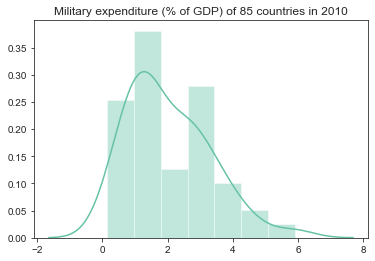

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("ticks")
sns.set_palette("Set2")

g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010')

Text(0.5, 1.0, 'Military expenditures & Debt of central governments in 2010')

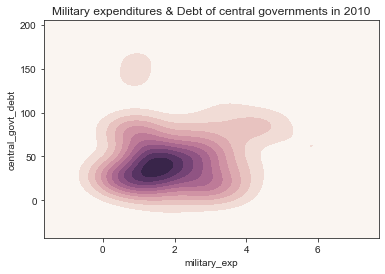

In [4]:
# Explore joint distribution with kernel density plots
# no clear correlation between the two, except may be for lower values
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt, cmap=cmap, shade=True)
g.set_title('Military expenditures & Debt of central governments in 2010')

### Time series data

Time series data is typically characterized by several interesting internal structures such as trend, seasonality, stationarity, autocorrelation, and so on.

Consider one country for a span of 10 years from 2001 to 2010.

In [5]:
central_govt_debt_us = central_govt_debt.loc['USA']
military_exp_us = military_exp.loc['USA']
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)

index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']

data_us.dropna(inplace=True)
data_us.shape

(22, 2)

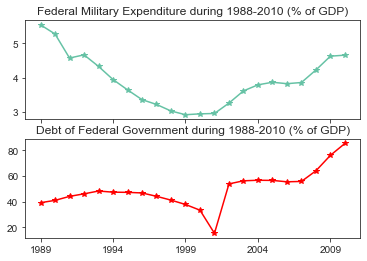

In [15]:
# Two subplots, the axes array is 1-d

f, axarr = plt.subplots(2, sharex=True)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])

### Panel data

Observe multiple entities over multiple points in time, also known as **longitudinal data**.

Now consider four countries over the same period of 1990-2010.

Text(0.5, 0, 'Years')

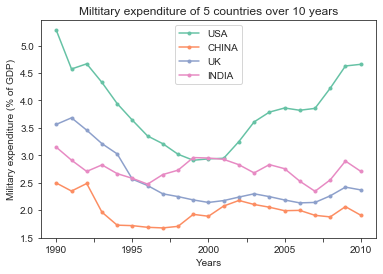

In [7]:
chn = military_exp.loc['CHN', '1990':'2010'].dropna()
usa = military_exp.loc['USA', '1990':'2010'].dropna()
ind = military_exp.loc['IND', '1990':'2010'].dropna()
gbr = military_exp.loc['GBR', '1990':'2010'].dropna()

usa.plot(linestyle='-', marker='.')
chn.plot(linestyle='-', marker='.')
gbr.plot(linestyle='-', marker='.')
ind.plot(linestyle='-', marker='.')
plt.legend(['USA','CHINA','UK','INDIA','RUSSIA'], loc=0)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')

<a name="p2"></a>
## 1.2 Internal structures of time series

### General trend
An upward or downward movement in the long run. The regression or trend line can then be used as a prediction of the long run movement of the time series. Residuals left by the trend line is further analyzed for other interesting properties such as seasonality, cyclical behavior, and irregular variations.

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text xticklabel objects>)

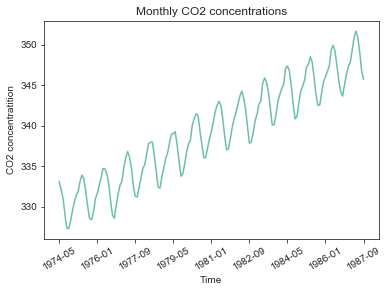

In [8]:
co2 = pd.read_excel('Data/Monthly_CO2_Concentrations.xlsx',
                     converters={'Year': np.int32, 'Month': np.int32})
co2.index = co2['Year'].astype(str)+'-'+co2['Month'].astype(str)\
                       .map(lambda x: '0'+x if len(x)==1 else x)
co2 = co2.dropna()
co2.sort_values(['Year', 'Month'], inplace=True)

co2['CO2'].plot()
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text xticklabel objects>)

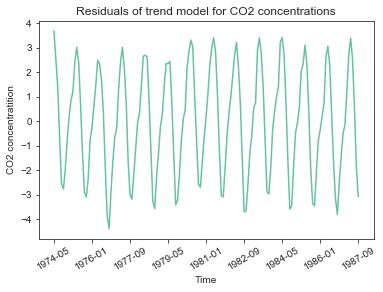

In [9]:
# Next, let us fit the trend line
from sklearn.linear_model import LinearRegression

trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.arange(co2.shape[0]).reshape((-1,1)), co2['CO2'])

# plot residual (de-trend): seasonality
residuals = np.array(co2['CO2']) - trend_model.predict(np.arange(co2.shape[0]).reshape((-1,1)))
pd.Series(data=residuals, index=co2.index).plot()
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

### Seasonality
3 plots to determine seasonality:
- Run sequence plot (mean)
$$x_t = (At+B)\sin(t) + \epsilon(t)$$
    which reveals
    - Movements in mean of the series
    - Shifts in variance
    - Presence of outliers

- Seasonal sub series plot (std) reveals
    - Variations within seasons as within a batch of successive months
    - Variations between seasons as between batches of successive months

- Multiple box plots reveals
  - Both central tendency and dispersion within the seasonal data
  - Separation between two adjacent box plots reveal the within season variations

In [18]:
co2['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'}
co2['Quarter'] = co2['Month'].map(lambda m: month_quarter_map.get(m))

seasonal_sub_series_data = co2.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']
seasonal_sub_series_data.head()

Quarterly Mean  Quarterly Standard Deviation
Year Quarter                                              
1974 Q2             3.096398                      0.820946
     Q3            -0.616085                      1.991671
     Q4            -1.822397                      1.014952
1975 Q1             0.754624                      0.511890
     Q2             2.604978                      0.355093

In [19]:
#Create row indices of seasonal_sub_series_data using Year & Quarter
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974-Q2,1974,Q2,3.096398,0.820946
1974-Q3,1974,Q3,-0.616085,1.991671
1974-Q4,1974,Q4,-1.822397,1.014952
1975-Q1,1975,Q1,0.754624,0.511890
1975-Q2,1975,Q2,2.604978,0.355093


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text xticklabel objects>)

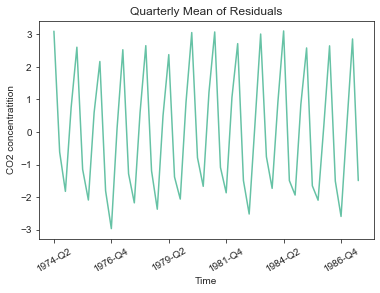

In [27]:
# Run sequence plot
seasonal_sub_series_data['Quarterly Mean'].plot()
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text xticklabel objects>)

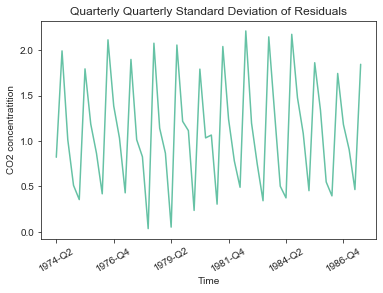

In [28]:
# Seasonal sub series plot
seasonal_sub_series_data['Quarterly Standard Deviation'].plot()
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

Text(0, 0.5, 'CO2 concentratition')

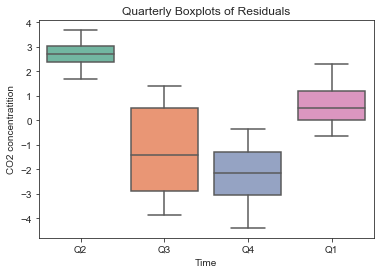

In [30]:
# Multiple box plots to visualize central tendency and dispersion of seasonal sub series
g = sns.boxplot(data=co2, y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition')

### Cyclical changes

- Occur less frequently than seasonal fluctuations
- Might not have a fixed period of variations
- The average periodicity for cyclical changes would be larger (most commonly in years)

long run plot

Cyclical changes occurring in inflation of consumer price index (CPI) for India and United States over the period of 1960 through 2016.

Text(0.5, 0, 'Years')

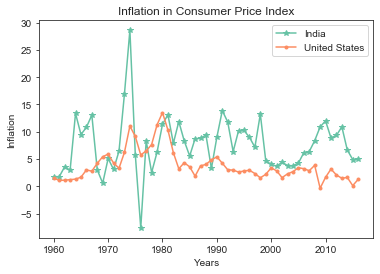

In [31]:
inflation = pd.read_excel('Data/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.')
plt.legend(['India','United States'], loc=0)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years')

### Unexpected variations

Unexpected variations are stochastic and cannot be framed in a mathematical model for a definitive future prediction. This type of error is due to lack of information about explanatory variables that can model these variations or due to presence of a random noise.

<a name="p3"></a>
## 1.3 Models for time series analysis

### Zero mean models
i.i.d. $X_i\sim N(0,\sigma^2)$

The zero mean with constant variance represents a random noise that can assume infinitely possible real values and is suited for representing irregular variations in the time series of a continuous variable. 

<a name="p4"></a>
## 1.4 Autocorrelation and Partial autocorrelation